In [10]:
# !pip install -U scikit-learn

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### RUBERT

In [105]:
# df = pd.read_csv("rubert_collected_data_with_sentiment.csv", index_col=0)
df_1 = pd.read_csv("data_with_sentiment.csv")
df = pd.read_csv("rubert_second_data.csv")

tuned_df = pd.read_csv("finetuned_rubert_data.csv")

In [106]:
tuned_df

,Name,Date,Review,Rating,Developer,Website,Sentiment
0,Лариса,2021-09-16,Главный минус - очень много мигрантов. С транс...,5,ПИК,Novostroy-m,neutral
1,Ульяна,2021-08-31,"ЖК радует просторным пешеходным бульваром, где...",4,ПИК,Novostroy-m,positive
2,Леша,2021-08-25,Касаемо самого комплекса — здесь есть нескольк...,5,ПИК,Novostroy-m,positive
3,Алена,2021-02-17,Микрорайон представляет место с развитой инфра...,5,ПИК,Novostroy-m,positive
4,Мария,2024-12-22,"Квартиру приняли хоть и с замечаниями, но за т...",5,ПИК,Forum-zhk,positive
...,...,...,...,...,...,...,...
3948,pavel,2018-05-23,Хочу оставить положительный отзыв о компании д...,5,Донстрой,Novostroev,positive
3949,Оксана,2025-01-30,"Давно дружу с Донстроем, покупал у них квартир...",5,Донстрой,Novostroev,positive
3950,Елизавета,2017-12-18,А чем вам не нравится факт застройки промзон? ...,5,Донстрой,Novostroev,positive
3951,Мария,2021-04-07,"Застройщик, который на любом объекте (от много...",1,Донстрой,Novostroev,positive


In [107]:
df["Predicted_santiment"] = df["Sentiment"]
del df["Sentiment"]

In [108]:
df

,Name,Date,Review,Rating,Developer,Website,Predicted_santiment
0,Лариса,2021-09-16,Главный минус - очень много мигрантов. С транс...,5,ПИК,Novostroy-m,neutral
1,Ульяна,2021-08-31,"ЖК радует просторным пешеходным бульваром, где...",4,ПИК,Novostroy-m,positive
2,Леша,2021-08-25,Касаемо самого комплекса — здесь есть нескольк...,5,ПИК,Novostroy-m,positive
3,Алена,2021-02-17,Микрорайон представляет место с развитой инфра...,5,ПИК,Novostroy-m,neutral
4,Мария,2024-12-22,"Квартиру приняли хоть и с замечаниями, но за т...",5,ПИК,Forum-zhk,neutral
...,...,...,...,...,...,...,...
3948,pavel,2018-05-23,Хочу оставить положительный отзыв о компании д...,5,Донстрой,Novostroev,neutral
3949,Оксана,2025-01-30,"Давно дружу с Донстроем, покупал у них квартир...",5,Донстрой,Novostroev,positive
3950,Елизавета,2017-12-18,А чем вам не нравится факт застройки промзон? ...,5,Донстрой,Novostroev,positive
3951,Мария,2021-04-07,"Застройщик, который на любом объекте (от много...",1,Донстрой,Novostroev,neutral


In [109]:
df_1

,Name,Date,Review,Rating,Developer,Website,Sentiment
0,Лариса,2021-09-16,Главный минус - очень много мигрантов. С транс...,5,ПИК,Novostroy-m,-1
1,Ульяна,2021-08-31,"ЖК радует просторным пешеходным бульваром, где...",4,ПИК,Novostroy-m,1
2,Леша,2021-08-25,Касаемо самого комплекса — здесь есть нескольк...,5,ПИК,Novostroy-m,1
3,Алена,2021-02-17,Микрорайон представляет место с развитой инфра...,5,ПИК,Novostroy-m,1
4,Мария,2024-12-22,"Квартиру приняли хоть и с замечаниями, но за т...",5,ПИК,Forum-zhk,1
...,...,...,...,...,...,...,...
3948,pavel,2018-05-23,Хочу оставить положительный отзыв о компании д...,5,Донстрой,Novostroev,1
3949,Оксана,2025-01-30,"Давно дружу с Донстроем, покупал у них квартир...",5,Донстрой,Novostroev,1
3950,Елизавета,2017-12-18,А чем вам не нравится факт застройки промзон? ...,5,Донстрой,Novostroev,1
3951,Мария,2021-04-07,"Застройщик, который на любом объекте (от много...",1,Донстрой,Novostroev,1


In [110]:
df["True_santiment"] = df_1["Sentiment"]

In [111]:
df["Tuned_santiment"] = tuned_df["Sentiment"]

In [112]:
df

,Name,Date,Review,Rating,Developer,Website,Predicted_santiment,True_santiment,Tuned_santiment
0,Лариса,2021-09-16,Главный минус - очень много мигрантов. С транс...,5,ПИК,Novostroy-m,neutral,-1,neutral
1,Ульяна,2021-08-31,"ЖК радует просторным пешеходным бульваром, где...",4,ПИК,Novostroy-m,positive,1,positive
2,Леша,2021-08-25,Касаемо самого комплекса — здесь есть нескольк...,5,ПИК,Novostroy-m,positive,1,positive
3,Алена,2021-02-17,Микрорайон представляет место с развитой инфра...,5,ПИК,Novostroy-m,neutral,1,positive
4,Мария,2024-12-22,"Квартиру приняли хоть и с замечаниями, но за т...",5,ПИК,Forum-zhk,neutral,1,positive
...,...,...,...,...,...,...,...,...,...
3948,pavel,2018-05-23,Хочу оставить положительный отзыв о компании д...,5,Донстрой,Novostroev,neutral,1,positive
3949,Оксана,2025-01-30,"Давно дружу с Донстроем, покупал у них квартир...",5,Донстрой,Novostroev,positive,1,positive
3950,Елизавета,2017-12-18,А чем вам не нравится факт застройки промзон? ...,5,Донстрой,Novostroev,positive,1,positive
3951,Мария,2021-04-07,"Застройщик, который на любом объекте (от много...",1,Донстрой,Novostroev,neutral,1,positive


In [113]:
df["True_santiment"].value_counts()

True_santiment
 1    1653
 0    1442
-1     858
Name: count, dtype: int64

In [114]:
df

,Name,Date,Review,Rating,Developer,Website,Predicted_santiment,True_santiment,Tuned_santiment
0,Лариса,2021-09-16,Главный минус - очень много мигрантов. С транс...,5,ПИК,Novostroy-m,neutral,-1,neutral
1,Ульяна,2021-08-31,"ЖК радует просторным пешеходным бульваром, где...",4,ПИК,Novostroy-m,positive,1,positive
2,Леша,2021-08-25,Касаемо самого комплекса — здесь есть нескольк...,5,ПИК,Novostroy-m,positive,1,positive
3,Алена,2021-02-17,Микрорайон представляет место с развитой инфра...,5,ПИК,Novostroy-m,neutral,1,positive
4,Мария,2024-12-22,"Квартиру приняли хоть и с замечаниями, но за т...",5,ПИК,Forum-zhk,neutral,1,positive
...,...,...,...,...,...,...,...,...,...
3948,pavel,2018-05-23,Хочу оставить положительный отзыв о компании д...,5,Донстрой,Novostroev,neutral,1,positive
3949,Оксана,2025-01-30,"Давно дружу с Донстроем, покупал у них квартир...",5,Донстрой,Novostroev,positive,1,positive
3950,Елизавета,2017-12-18,А чем вам не нравится факт застройки промзон? ...,5,Донстрой,Novostroev,positive,1,positive
3951,Мария,2021-04-07,"Застройщик, который на любом объекте (от много...",1,Донстрой,Novostroev,neutral,1,positive


In [115]:
# df["True_santiment"] = df["True_santiment"].replace({1:"positive", -1:"negative", 0:"neutral"})

In [116]:
df

,Name,Date,Review,Rating,Developer,Website,Predicted_santiment,True_santiment,Tuned_santiment
0,Лариса,2021-09-16,Главный минус - очень много мигрантов. С транс...,5,ПИК,Novostroy-m,neutral,-1,neutral
1,Ульяна,2021-08-31,"ЖК радует просторным пешеходным бульваром, где...",4,ПИК,Novostroy-m,positive,1,positive
2,Леша,2021-08-25,Касаемо самого комплекса — здесь есть нескольк...,5,ПИК,Novostroy-m,positive,1,positive
3,Алена,2021-02-17,Микрорайон представляет место с развитой инфра...,5,ПИК,Novostroy-m,neutral,1,positive
4,Мария,2024-12-22,"Квартиру приняли хоть и с замечаниями, но за т...",5,ПИК,Forum-zhk,neutral,1,positive
...,...,...,...,...,...,...,...,...,...
3948,pavel,2018-05-23,Хочу оставить положительный отзыв о компании д...,5,Донстрой,Novostroev,neutral,1,positive
3949,Оксана,2025-01-30,"Давно дружу с Донстроем, покупал у них квартир...",5,Донстрой,Novostroev,positive,1,positive
3950,Елизавета,2017-12-18,А чем вам не нравится факт застройки промзон? ...,5,Донстрой,Novostroev,positive,1,positive
3951,Мария,2021-04-07,"Застройщик, который на любом объекте (от много...",1,Донстрой,Novostroev,neutral,1,positive


In [117]:
df["True_santiment"].value_counts()

True_santiment
 1    1653
 0    1442
-1     858
Name: count, dtype: int64

In [118]:
df["Predicted_santiment"].value_counts()

Predicted_santiment
neutral     1457
positive    1386
negative    1110
Name: count, dtype: int64

In [119]:
# Преобразуем предсказанные значения в числовой формат
sentiment_mapping = {"positive": 1, "neutral": 0, "negative": -1}
df["Predicted_santiment"] = df["Predicted_santiment"].map(sentiment_mapping)

In [120]:
df["Tuned_santiment"] = df["Tuned_santiment"].map(sentiment_mapping)

In [121]:
df["Tuned_santiment"].value_counts()

Tuned_santiment
 1    1758
 0    1508
-1     687
Name: count, dtype: int64

In [122]:
df["True_santiment"].value_counts()

True_santiment
 1    1653
 0    1442
-1     858
Name: count, dtype: int64

In [124]:
# Посчитаем accuracy
accuracy = accuracy_score(df["True_santiment"], df["Predicted_santiment"])
print(f"Accuracy: {accuracy:.2f}")


# accuracy = accuracy_score(df["Tuned_santiment"], df["True_santiment"])
# print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.52


In [125]:
# Построим confusion matrix
conf_matrix = confusion_matrix(df["True_santiment"], df["Predicted_santiment"])
# conf_matrix = confusion_matrix(df["Tuned_santiment"], df["Predicted_santiment"])

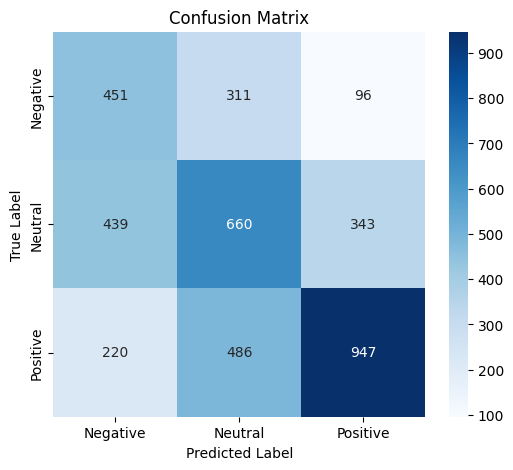

In [126]:
# Визуализация confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Модель в целом хорошо классифицирует Negative и Positive, но очень плохо классифицирует Neutral.

    - Особенно большая проблема с классом Neutral (много ошибок).
    
    - Вероятно, нейтральные отзывы содержат слова, которые схожи с негативными или позитивными.



- Модель в целом работает, но очень плохо выделяет нейтральные отзывы – вероятно, потому что они пересекаются по смыслу с негативными и позитивными.

In [104]:
# Создадим DataFrame с правильными и неправильными предсказаниями
df["Correct"] = df["True_santiment"] == df["Predicted_santiment"]
correct_counts = df["Correct"].value_counts()


/var/folders/43/rsc11w1d66s1zp7j_p4qkq600000gn/T/ipykernel_18366/512351401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correct_counts.index.astype(str), y=correct_counts.values, palette="viridis")


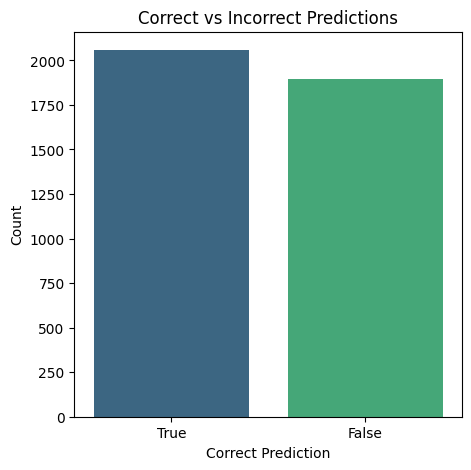

In [127]:


# График правильных/неправильных предсказаний
plt.figure(figsize=(5, 5))
sns.barplot(x=correct_counts.index.astype(str), y=correct_counts.values, palette="viridis")
plt.xlabel("Correct Prediction")
plt.ylabel("Count")
plt.title("Correct vs Incorrect Predictions")
plt.show()

In [129]:
# Выведем классификационный отчет
print("Classification Report:\n", classification_report(df["True_santiment"], df["Predicted_santiment"]))


Classification Report:
               precision    recall  f1-score   support

          -1       0.41      0.53      0.46       858
           0       0.45      0.46      0.46      1442
           1       0.68      0.57      0.62      1653

    accuracy                           0.52      3953
   macro avg       0.51      0.52      0.51      3953
weighted avg       0.54      0.52      0.53      3953



- Класс -1 (отрицательный)

- Класс 0 (нейтральный)

- Класс 1 (положительный)

Разберем метрики:

    1. Precision (Точность): Доля правильно предсказанных примеров данного класса среди всех, которым модель присвоила этот класс.

        Для класса -1: 0.80 (80% предсказаний, сделанных как -1, оказались верными).

        Для класса 0: 0.22 (очень низкая точность, модель часто ошибается при предсказании 0).

        Для класса 1: 0.78 (78% предсказаний 1 были верными).

    Recall (Полнота): Доля правильно предсказанных примеров данного класса среди всех фактических примеров этого класса.

        Для класса -1: 0.66 (только 66% реальных -1 были правильно предсказаны).

        Для класса 0: 0.43 (модель находит только 43% примеров 0, плохо выделяет нейтральные отзывы).

        Для класса 1: 0.62 (62% реальных 1 были правильно определены).

    F1-score: Среднее гармоническое между precision и recall.

        Для класса -1: 0.72 (достаточно сбалансирован).

        Для класса 0: 0.29 (очень слабый, модель не справляется с нейтральными отзывами).

        Для класса 1: 0.69 (в целом, неплохо).

    Accuracy (Общая точность): 0.60 (то есть 60% всех предсказаний были верными).

    Macro average (среднее арифметическое по классам):

        Precision: 0.60

        Recall: 0.57
        F1-score: 0.57

        Учитывает все классы одинаково, поэтому сильно страдает из-за плохого качества для класса 0.

    Weighted average (взвешенное среднее по классам):

        Precision: 0.69

        Recall: 0.60

        F1-score: 0.63

        Взвешенное среднее учитывает количество примеров в каждом классе (самый частый класс вносит больший вклад).




- Модель лучше всего предсказывает классы -1 (негативные) и 1 (позитивные), но плохо справляется с классом 0 (нейтральные отзывы).

- Precision и recall для класса 0 очень низкие, что говорит о том, что модель либо путает нейтральные отзывы с позитивными/негативными, либо просто плохо выделяет их признаки.